In [1]:
# # # Liver Disease Prediction

In [2]:
# Import all required libraries for reading data, analysing and visualizing data to perform data pre-proccessing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings('ignore')
from collections import Counter

In [5]:
# # # Data Pre-Proccessing

In [4]:
# # Data Analysis, Visualization and Exploration

In [5]:
# Loading the dataset

In [6]:
liver_df = pd.read_csv("patients.csv")

In [7]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
liver_df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [9]:
# The dataset has 416 liver disease patients and 167 non liver disease patients
# 2- non liver patient and 1 is liver patient 
# There are 583 rows and 11 columns in the dataset

In [10]:
# Checking for null values in the dataset (Filling the missing values )

In [11]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [12]:
# Here is the observation from the dataset:   
# 1) Only gender is non-numeric veriable. All others are numeric.   
# 2) There are 10 features and 1 output - dataset.   
# 3) In Albumin and Globulin ration we can see four missing values
# 4) Some of the values are int they should be converted to float for better accuracy

In [13]:
# Let us first fill in the null values of the dataset rather than dropping the whole row with the mean of it 

In [14]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [15]:
# Clearly shows 4 null values 

In [16]:
# We will now take the mean of Albumin and Globulin ratio and fill them in the null values 

In [17]:
liver_df['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [18]:
liver_df['Albumin_and_Globulin_Ratio'] = liver_df['Albumin_and_Globulin_Ratio'].fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [19]:
# Thus the null values have been filled and can be checked

In [20]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [21]:
# Changing all the int types into float types

In [22]:
liver_df['Albumin_and_Globulin_Ratio']=liver_df['Albumin_and_Globulin_Ratio'].astype('float')
liver_df['Albumin']=liver_df['Albumin'].astype('float')
liver_df['Total_Protiens']=liver_df['Total_Protiens'].astype('float')

In [23]:
# Let us check for duplicate values and rows in the dataset 

In [24]:
# Checking the duplicate values by their first occurance in the dataset

In [25]:
duplicateRowsDF = liver_df[liver_df.duplicated(keep='first')]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
19    40  Female              0.9               0.3                   293   
26    34    Male              4.1               2.0                   289   
34    38  Female              2.6               1.2                   410   
55    42    Male              8.9               4.5                   272   
62    58    Male              1.0               0.5                   158   
106   36    Male              5.3               2.3                   145   
108   36    Male              0.8               0.2                   158   
138   18    Male              0.8               0.2                   282   
143   30    Male              1.6               0.4                   332   
158   72    Male              0.7               0.1                   196   
164   39    Male              1.9               0.9                   180   
174   31  

In [26]:
# Checking the duplicate values by their last occurance in the dataset

In [27]:
duplicateRowsDF = liver_df[liver_df.duplicated(keep='last')]
print("Duplicate Rows except last occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except last occurrence based on all columns are :
     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
18    40  Female              0.9               0.3                   293   
25    34    Male              4.1               2.0                   289   
33    38  Female              2.6               1.2                   410   
54    42    Male              8.9               4.5                   272   
61    58    Male              1.0               0.5                   158   
105   36    Male              5.3               2.3                   145   
107   36    Male              0.8               0.2                   158   
137   18    Male              0.8               0.2                   282   
142   30    Male              1.6               0.4                   332   
157   72    Male              0.7               0.1                   196   
163   39    Male              1.9               0.9                   180   
173   31   

In [28]:
# Let us now check for outliers in the datasets (Outlier Detection)

In [29]:
# # Distribution of Numerical Features for all attributes in a histogram to see the range of values present

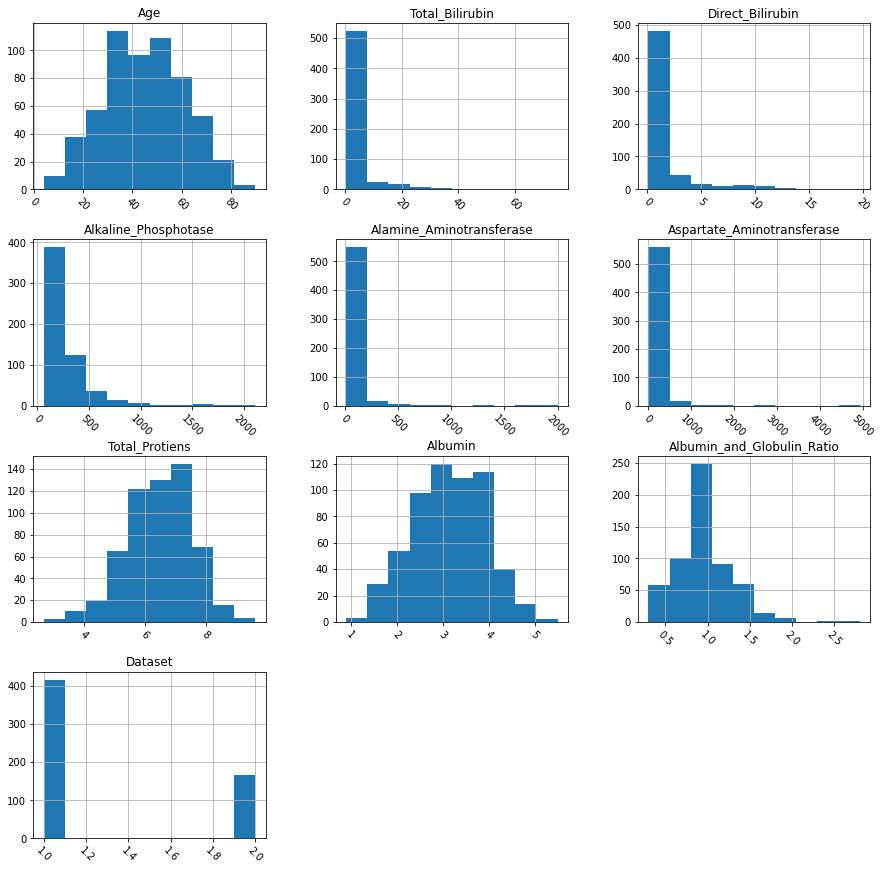

In [30]:
# Plot histogram grid
liver_df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [31]:
liver_df.describe() # Decribing a dataset for finding the maximum and minimum value of each attribute

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [32]:
# It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

In [33]:
# Thus let us try understanding more about the outliers via boxplots

<AxesSubplot:xlabel='Total_Bilirubin'>

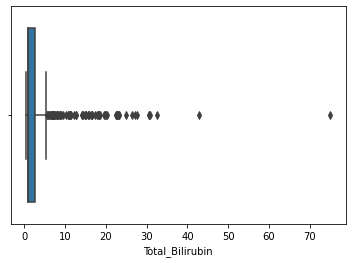

In [34]:
sns.boxplot(liver_df.Total_Bilirubin)

In [35]:
liver_df.Total_Bilirubin.sort_values(ascending=False).head()

166    75.0
559    42.8
505    32.6
531    30.8
259    30.5
Name: Total_Bilirubin, dtype: float64

In [36]:
# These outliers values will not matter since, one of the highest recorded bilirubin count is 80 mg/dl
# Since 75 is the highest and can be seen in a liver disease patient we will be keeping it

<AxesSubplot:xlabel='Direct_Bilirubin'>

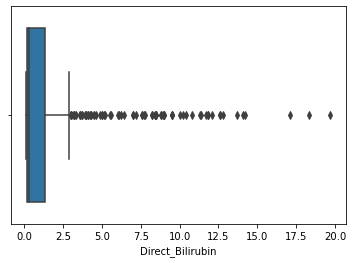

In [37]:
sns.boxplot(liver_df.Direct_Bilirubin)

In [38]:
# Direct Bilirubin which is a part of Total Bilirubin constitutes roughly 10% of it . And these values cannot be considered as outliers

<AxesSubplot:xlabel='Alkaline_Phosphotase'>

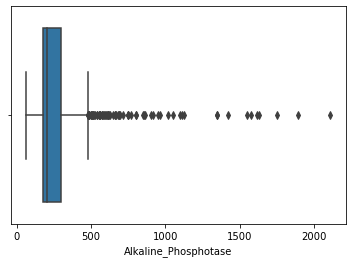

In [39]:
sns.boxplot(liver_df.Alkaline_Phosphotase)

In [40]:
# The ALP levels ranges from 1,005 to 3,067 IU/L so even this would not matter 

<AxesSubplot:xlabel='Alamine_Aminotransferase'>

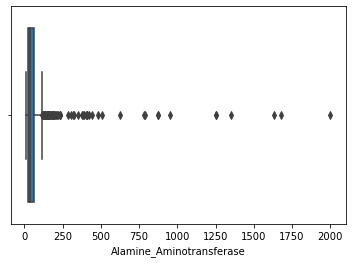

In [41]:
sns.boxplot(liver_df.Alamine_Aminotransferase)

In [42]:
# The measures of ALT can be  >1,000 IU/l thus the values can be considered and the difference between the outliers is neglegeble

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

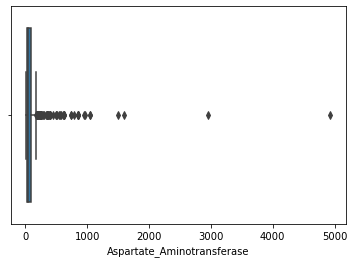

In [43]:
sns.boxplot(liver_df.Aspartate_Aminotransferase)

In [44]:
liver_df.Aspartate_Aminotransferase.sort_values(ascending=False).head() # Here the difference of values is very high but also withing the highest recorded range

135    4929
117    2946
118    1600
207    1500
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

<AxesSubplot:xlabel='Total_Protiens'>

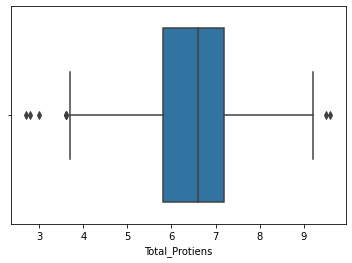

In [45]:
sns.boxplot(liver_df.Total_Protiens)

In [46]:
# These values will not create any hinderence to the model

<AxesSubplot:xlabel='Albumin'>

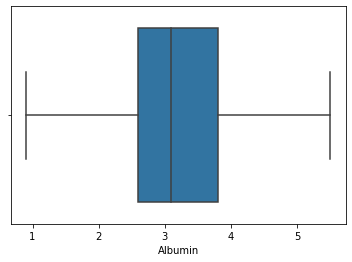

In [47]:
sns.boxplot(liver_df.Albumin)

In [48]:
# We can obsereve that there are no outliers present 

<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

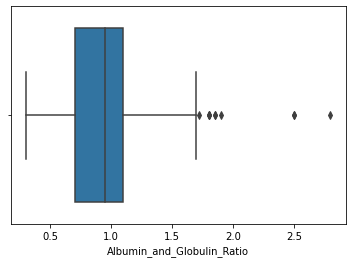

In [49]:
sns.boxplot(liver_df.Albumin_and_Globulin_Ratio)

In [50]:
# By this observation we can see that these values would not cause any hinderence to the model thus can be used

In [51]:
# Understanding the dataset better by visualized graphs (Data Visualization)

Text(0, 0.5, 'Frequency')

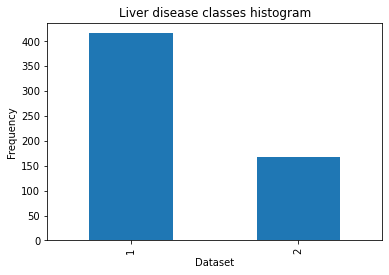

In [52]:
count_classes = pd.value_counts(liver_df['Dataset'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")

In [53]:
# 2- non liver patient and 1 is liver patient 

In [54]:
liver_df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

Number of patients that are male:  441
Number of patients that are female:  142


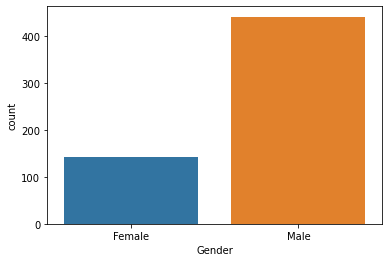

In [55]:
# Plot showing the total number of males and females in our dataset
# We can see the male count is much higher than the female
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [56]:
# Trying to see if age is a factor for liver disease for both male and female genders

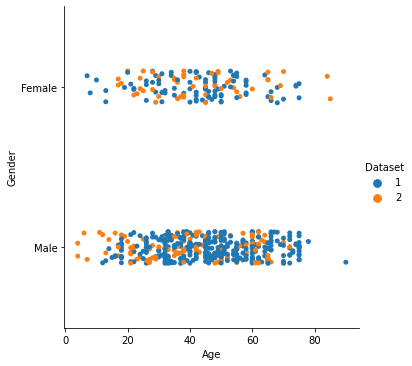

In [57]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=liver_df);

In [58]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=True)

,Dataset,Gender,Age
0,1,Female,43.347826
1,1,Male,46.950617
2,2,Female,42.740000
3,2,Male,40.598291


In [59]:
# So here we can clearly observe that at the age of 40 to 60 people diagnosed with liver disease is very high

In [60]:
# # # Feature Selection Observation

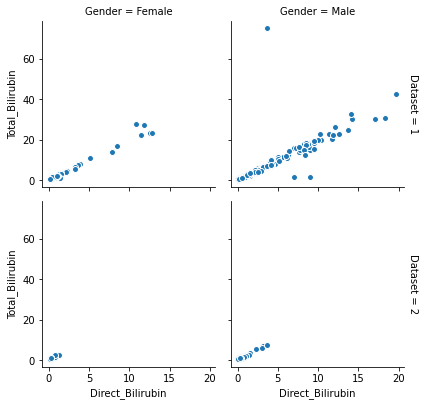

In [61]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

In [78]:
# In this scatter plot we can observe that all the values are in a linear line this shows that there is a direct relationship between both Direct and Total Bilirubin

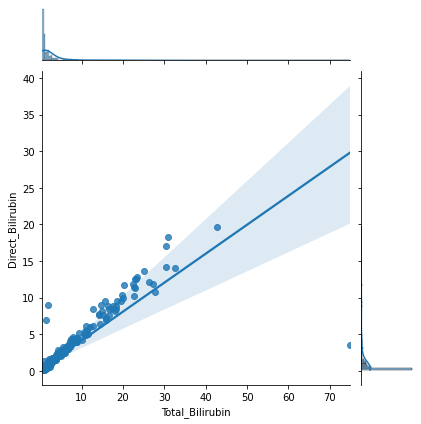

In [62]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

In [63]:
# Here we can almost observe a linear line which represents high similarity in both Direct and Total Bilirubin 

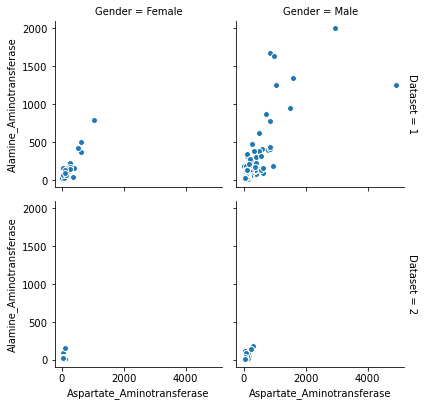

In [64]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [65]:
# There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. But not as much as Total and Direct Bilirubin

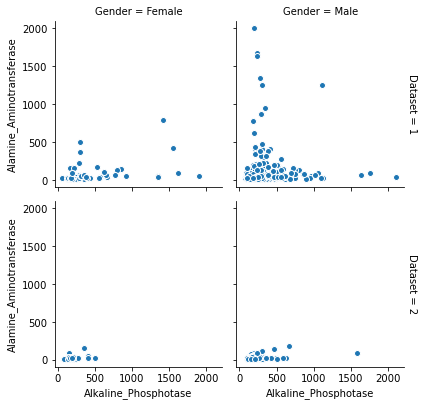

In [67]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

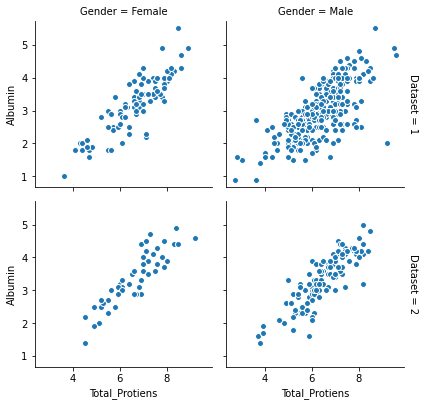

In [68]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [69]:
# There is linear relationship between Total_Protiens and Albumin and the gender. 

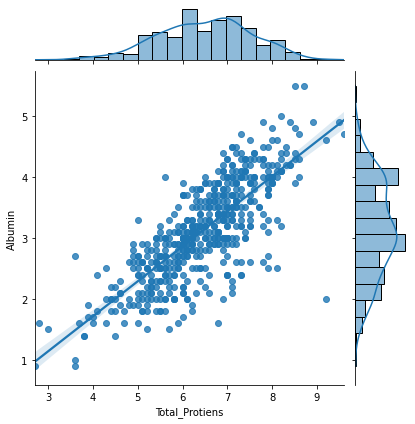

In [70]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

In [71]:
# There is a linear relationship but both are important parameters in detection of liver disease thus none of them can be dropped

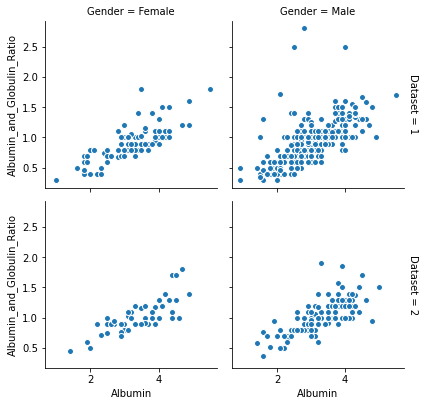

In [72]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [73]:
# There is linear relationship between Albumin_and_Globulin_Ratio and Albumin.

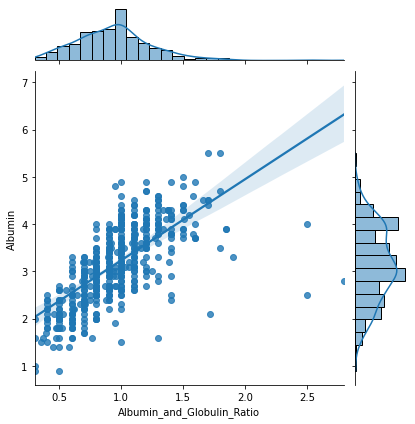

In [74]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

In [75]:
# Thus by this information we can observe that the jointplot has lesser linear relationship than showed in scatter plot 

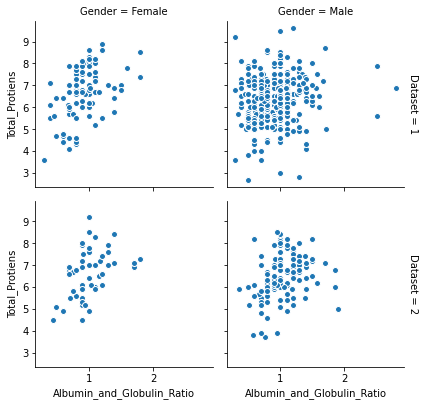

In [76]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [78]:
# By this plot we can observe that the linear relationship low.

In [79]:
# # Observation
#From the above jointplots and scatterplots, we find direct relationship between the following features:
#Direct_Bilirubin & Total_Bilirubin
#Aspartate_Aminotransferase & Alamine_Aminotransferase
#Total_Protiens & Albumin
#Albumin_and_Globulin_Ratio & Albumin
#Total_Protiens & Albumin_and_Globulin_Ratio

In [80]:
# # Label Encoding

In [81]:
# Have to remap the class labels for convenience, no liver disease(2) then:=0 for patients having liver disease(1) then:=1

In [82]:
liver_df['Dataset'] = liver_df['Dataset'].map({2:0,1:1})

In [83]:
liver_df['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [84]:
# # Encoding -2  Male and Female

In [85]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [86]:
liver_df = binary_encode(liver_df, 'Gender', 'Male')

In [87]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [88]:
# 1 is male and 0 is female

In [89]:
# # Corelation

In [90]:
liver_df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,-0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,-0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,-0.162319


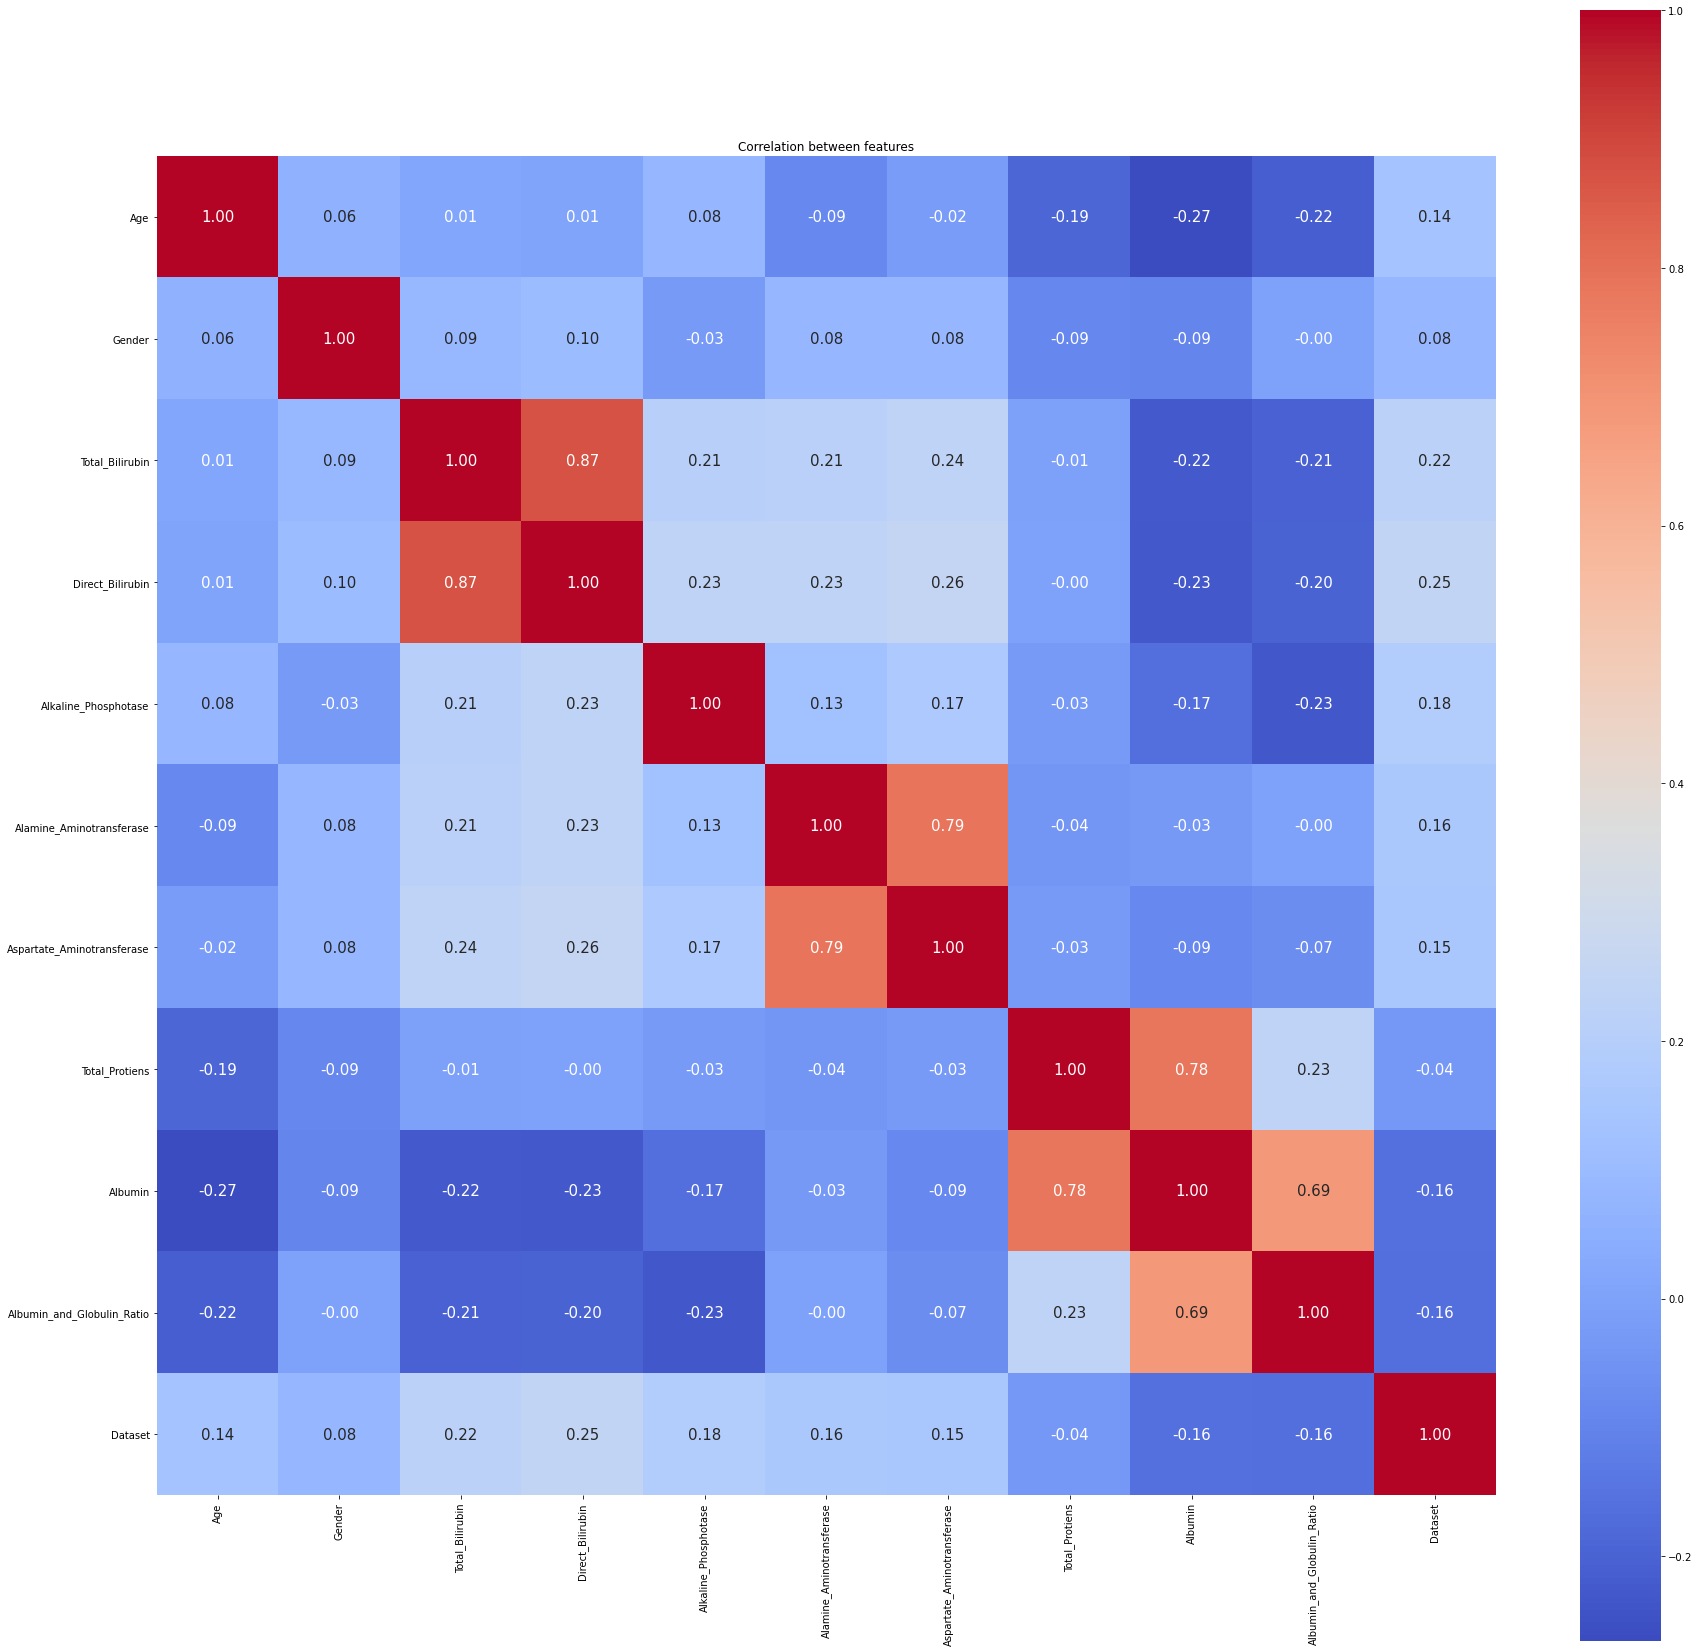

In [91]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [92]:
#The above correlation also indicates the following correlation
# Total_Protiens & Albumin
# Alamine_Aminotransferase & Aspartate_Aminotransferase
# Direct_Bilirubin & Total_Bilirubin
# There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

In [93]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import keras.backend
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Data Preparation

In [94]:
from sklearn.model_selection import train_test_split

X = liver_df.iloc[:,:-1]
y = liver_df.Dataset

# The data is very imbalanced. So we are performing an 
# oversampling method to make our predictions more accurate

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=100)
X, y = ros.fit_resample(X, y)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=220)

# Machine Learning models 

In [96]:
# For measuring the accuracy of the models, we also import accuracy_score,
# classification_report, roc_curve, roc_auc_score

from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

In [97]:
#1)Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=False, C=2)
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

In [98]:
print("Train Score:", log_reg.score(X_train, y_train))
print("Test Score:", log_reg.score(X_test, y_test))

Train Score: 0.6857142857142857
Test Score: 0.7065868263473054


In [99]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Dataset,,
0,70,18
1,31,48


In [100]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        88
           1       0.73      0.61      0.66        79

    accuracy                           0.71       167
   macro avg       0.71      0.70      0.70       167
weighted avg       0.71      0.71      0.70       167



As we can see, logistic regression is not the best model for this classification and we may have to try with more complex algorithms

In [101]:
#2) Knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4,
                           weights='distance')
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [102]:
print("Train Score:", knn.score(X_train, y_train))
print("Test Score:", knn.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.8143712574850299


In [103]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Dataset,,
0,86,2
1,29,50


In [104]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        88
           1       0.96      0.63      0.76        79

    accuracy                           0.81       167
   macro avg       0.85      0.81      0.81       167
weighted avg       0.85      0.81      0.81       167



In [105]:
import sklearn.metrics as metrics

In [106]:
# Retriveing the probablity of the patients having liver disease

y_pred_proba = knn.predict_proba(X_test)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

In [110]:
print("Test roc-auc : ", roc_auc_score(y_test, y_pred_proba))

Test roc-auc :  0.9569907940161104


In [111]:
print(accuracy_score(y_test, y_predict))

0.8622754491017964


In [112]:
#3) Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=70, 
                             max_depth=30, min_samples_split=2)
dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)

In [113]:
print("Train Score:", dtc.score(X_train, y_train))
print("Test Score:", dtc.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.8622754491017964


In [114]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Dataset,,
0,85,3
1,20,59


In [115]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        88
           1       0.95      0.75      0.84        79

    accuracy                           0.86       167
   macro avg       0.88      0.86      0.86       167
weighted avg       0.88      0.86      0.86       167



In [116]:
# Retriveing the probablity of the patients having liver disease

y_pred_proba = dtc.predict_proba(X_test)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

In [117]:
print("Test roc-auc : ", roc_auc_score(y_test, y_pred_proba))

Test roc-auc :  0.8563722669735327


In [118]:
# 4) Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,
                             random_state=10, 
                             max_depth=100,)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)

In [119]:
print("Train Score:", rfc.score(X_train, y_train))
print("Test Score:", rfc.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.9041916167664671


In [120]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Dataset,,
0,85,3
1,13,66


In [121]:
print('Confusion Matrix: \n', confusion_matrix(y_test,y_predict))

Confusion Matrix: 
 [[85  3]
 [13 66]]


In [122]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91        88
           1       0.96      0.84      0.89        79

    accuracy                           0.90       167
   macro avg       0.91      0.90      0.90       167
weighted avg       0.91      0.90      0.90       167



In [123]:
y_pred_proba = rfc.predict_proba(X_test)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

In [124]:
print("Test roc-auc : ", roc_auc_score(y_test, y_pred_proba))

Test roc-auc :  0.9792146144994246


In [125]:
print(accuracy_score(y_test, y_predict))

0.9041916167664671


In [127]:
#Random Forest has reached the highest accuracy till now 

In [128]:
#5) SVC 
from sklearn.svm import SVC
from sklearn import svm

svc = SVC(C=19, gamma=0.010, random_state=60,
          probability=True) 
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)

In [129]:
print("Train Score:", svc.score(X_train, y_train))
print("Test Score:", svc.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.9341317365269461


In [130]:
pd.crosstab(y_test, y_predict)

col_0,0,1
Dataset,,
0,84,4
1,7,72


In [131]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        88
           1       0.95      0.91      0.93        79

    accuracy                           0.93       167
   macro avg       0.94      0.93      0.93       167
weighted avg       0.93      0.93      0.93       167



In [132]:
# Retriveing the probablity of the patients having liver disease

y_pred_proba = svc.predict_proba(X_test)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

In [133]:
print("Test roc-auc : ", roc_auc_score(y_test, y_pred_proba))

Test roc-auc :  0.9608745684695053


In [134]:
print(accuracy_score(y_test, y_predict))

0.9341317365269461


In [136]:
svm_classifier = SVC(C=19, gamma=0.010, random_state=60,
          probability=True)
svm_classifier.fit(X_train, y_train)

svm_y_pred = svm_classifier.predict(X_test)

svm_cm = confusion_matrix(y_test, svm_y_pred
                         )
print('Confusion Matrix: \n', confusion_matrix(y_test,svm_y_pred))
print(accuracy_score(y_test, svm_y_pred))
accuracy=accuracy_score(y_test,svm_y_pred)
print(precision_score(y_test, svm_y_pred))

Confusion Matrix: 
 [[84  4]
 [ 7 72]]
0.9341317365269461
0.9473684210526315


In [137]:
## Predict Train results
y_train_pred = svm_classifier.predict(X_train)

In [138]:
## Predict Test results
y_pred = svm_classifier.predict(X_test)

In [139]:
confusion_matrix(y_test, y_pred).T

array([[84,  7],
       [ 4, 72]], dtype=int64)

In [140]:
y_pred_proba = svm_classifier.predict_proba(X_test)[:,1]

In [141]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

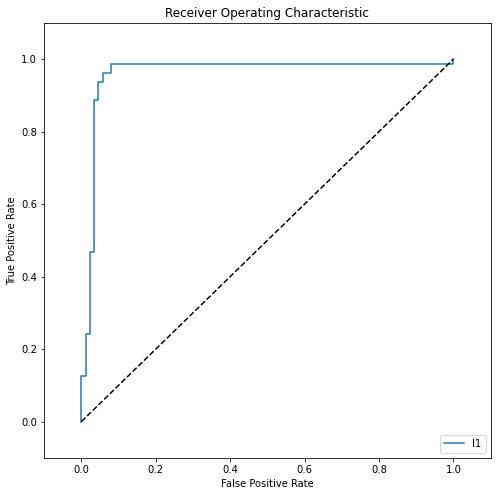

In [142]:

# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [143]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

1.0

In [144]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
print(auc(fpr, tpr))

0.9608745684695053


In [145]:
import pickle 
pickle.dump(svm_classifier, open('model1.pkl','wb'))